Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
# args = fovea.Params(do_fovea=True, n_train_stop=2_000, n_val_stop=1_000)
# args = fovea.Params(do_fovea=True, n_train_stop=200_000, n_val_stop=10_000, in_memory=True)
# args = fovea.Params(do_fovea=True, n_train_stop=0, n_val_stop=0, in_memory=False)
# args = fovea.Params(do_fovea=True, model_name='resnet101', n_train_stop=0, n_val_stop=0, in_memory=True)
args = fovea.Params(do_fovea=True, model_name='resnet101', n_train_stop=0, n_val_stop=0, in_memory=False, num_epochs=8)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	- Timestamp (UTC)  2025-12-04_09-10-51	 user laurentperrinet	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 2018 has been set.


Params(image_size=224, do_mask=False, do_fovea=True, rs_min=0.0, rs_max=-6.0, padding_mode='zeros', seed=2018, batch_size=80, num_workers=0, in_memory=False, model_name='resnet101', do_scratch=False, num_epochs=8, n_train_stop=0, n_val_stop=0, lr=1e-06, delta1=0.1, delta2=0.007, weight_decay=0.03, label_smoothing=0.2, shuffle=True, verbose=True)

In [2]:
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning)
# warnings.filterwarnings(
#     "ignore",
#     message=r"iCCP: profile 'ICC Profile'",
#     category=UserWarning,
#     module='PIL.PngImagePlugin'
# )

# testing each network on the validation dataset

In [3]:
%ls cached_data/31*

cached_data/31_fovea_model_name=resnet101_dataset=bbox_retrained_bkp.json
cached_data/31_fovea_model_name=resnet101_dataset=bbox_retrained_bkp.pth
cached_data/31_fovea_model_name=resnet101_dataset=bbox.json
cached_data/31_fovea_model_name=resnet101_dataset=bbox.pth
cached_data/31_fovea_model_name=resnet101_dataset=full.json
cached_data/31_fovea_model_name=resnet101_dataset=full.pth


In [4]:
# %rm "cached_data/31_fovea_model_name=resnet101_dataset=bbox"  # FORCING RECOMPUTE
# %rm "cached_data/31_fovea_model_name=resnet101_dataset=bbox.lock"  # FORCING RECOMPUTE
# %rm cached_data/31_fovea_model_*  # FORCING RECOMPUTE
# %rm cached_data/31_fovea_model_*.lock  # FORCING RECOMPUTE
model_name = args.model_name
# do_full_training
for dataset in ['bbox']: # fovea.all_datasets:
    name = f'31_fovea_model_name={model_name}_dataset={dataset}'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/31_fovea_model_name=resnet101_dataset=bbox.json
cached_data/31_fovea_model_name=resnet101_dataset=bbox.pth: accuracy = 0.685
..................................................


## Model comparison

In [5]:
model_name = args.model_name
for dataset in fovea.all_datasets:
    results = fovea.pd.read_json(args.data_cache / f'31_fovea_model_name={model_name}_dataset={dataset}.json')
    print(model_name, dataset, results.tail(1)['acc_val'])

resnet101 full 9    0.702881
Name: acc_val, dtype: float64
resnet101 bbox 8    0.693371
Name: acc_val, dtype: float64


In [6]:

len(results)

9

In [7]:
results.tail(1)

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
8,8,80400,5537520,0.597625,0.834898,1.339874,0.693371,30998.153065


In [8]:
results.tail(1)['acc_val']

8    0.693371
Name: acc_val, dtype: float64

In [9]:
# results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
# results_13

In [10]:
%ls cached_data/20*

zsh:1: no matches found: cached_data/20*


In [11]:
# model_name, dataset

In [12]:
# results_20 = fovea.pd.read_json(args.data_cache / '20_model_name={model_name}_dataset={dataset}.json')
# results_20

In [13]:
# for dataset in fovea.all_datasets:
#     name = f'20_model_name={model_name}_dataset={dataset}'
#     model_filename, json_filename = fovea.do_learning(args, dataset, name)
#     results = fovea.pd.read_json(json_filename)
#     print(results)

## Plot learning evolution

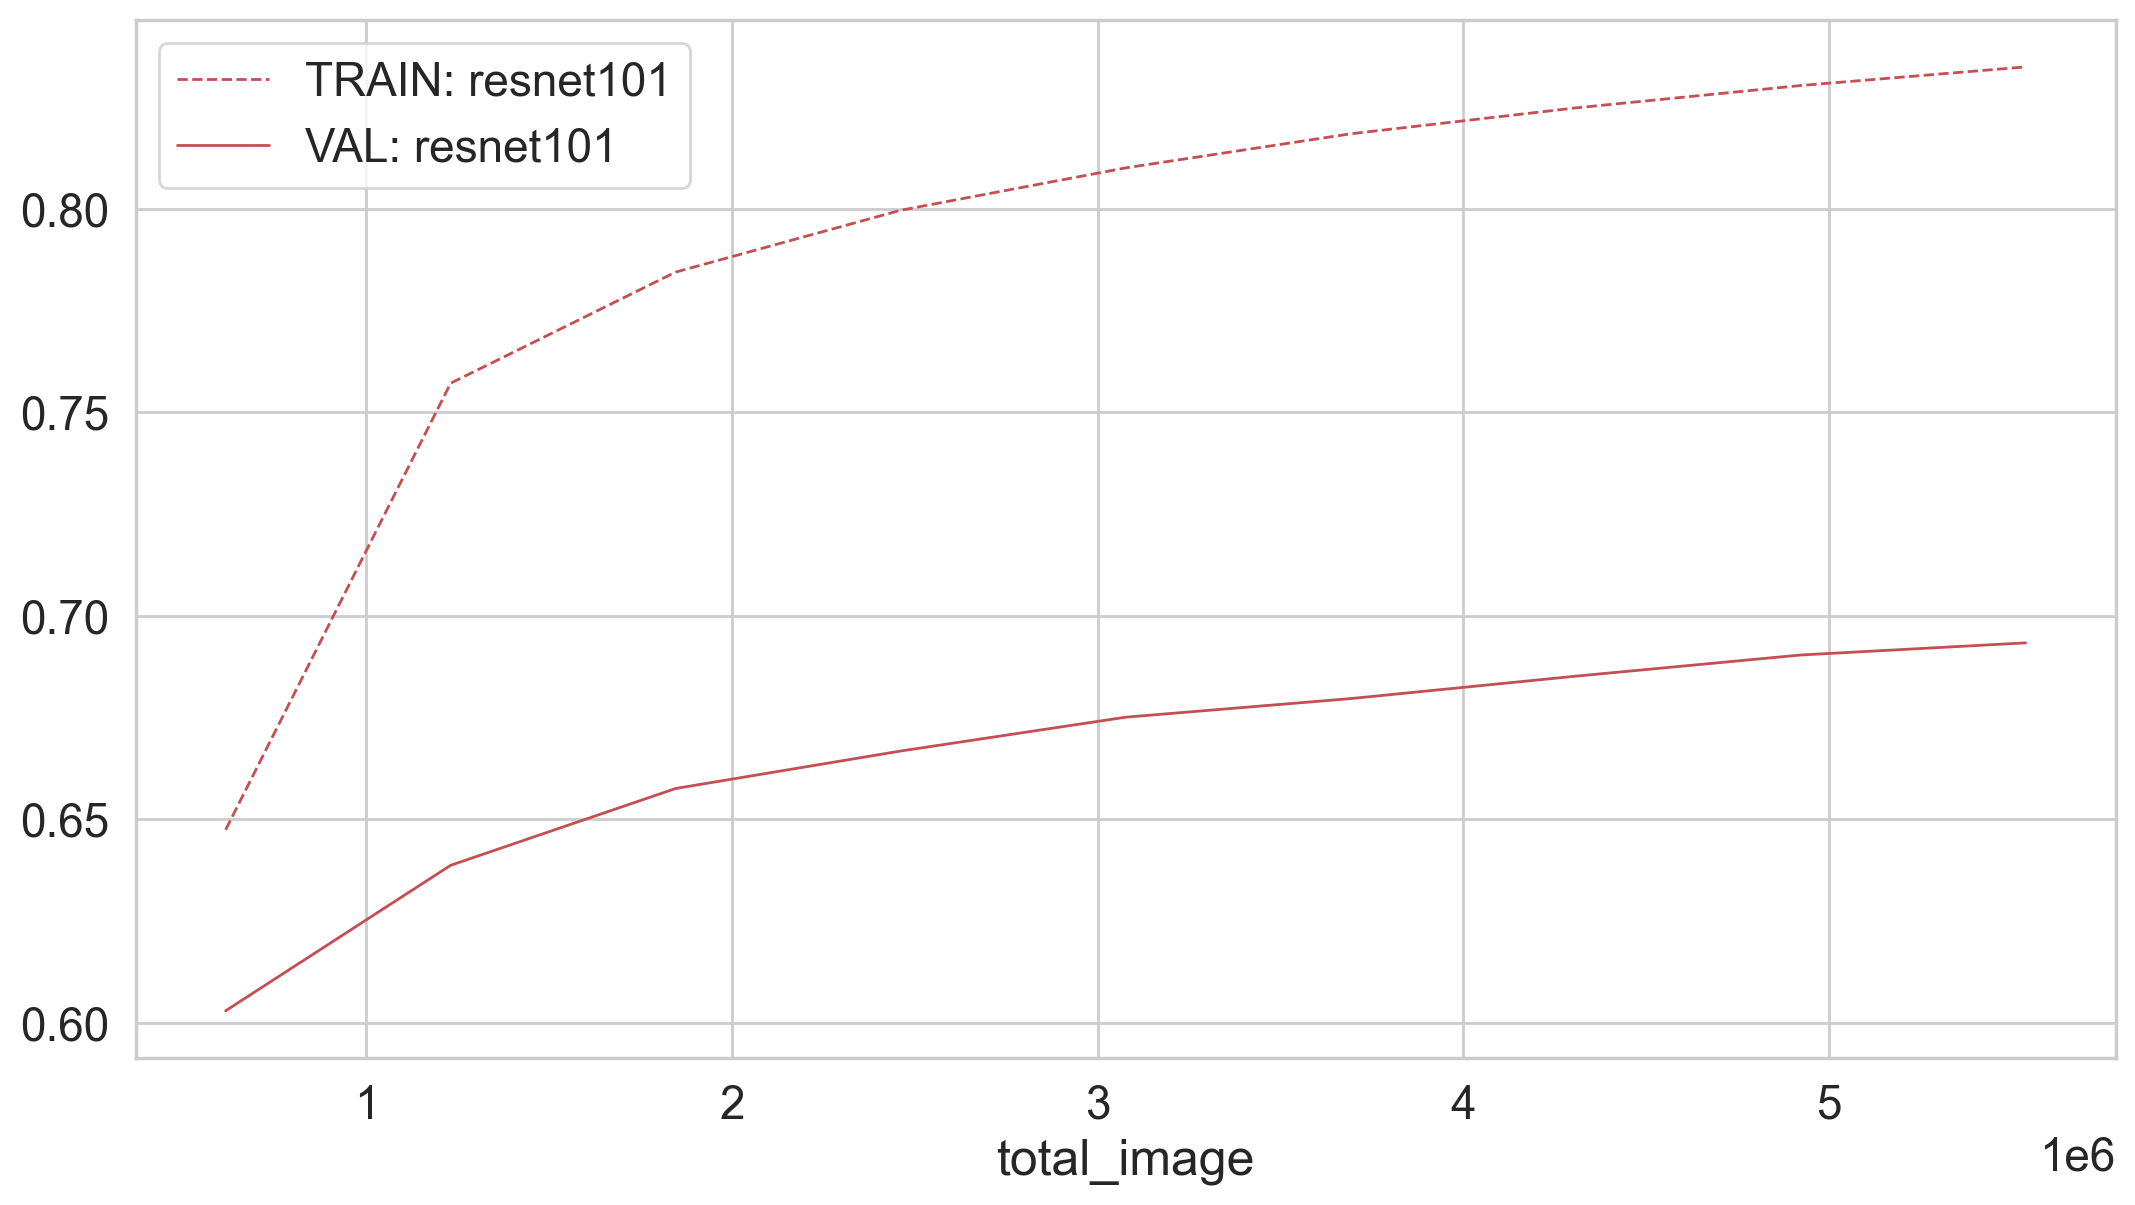

In [14]:
fig, ax = fovea.plt.subplots()
for dataset in ['bbox']:#fovea.all_datasets:
    color = 'r'
    lw = 1

    # name = f'31_fovea_model_name={model_name}_dataset={dataset}'
    # cached_data/31_fovea_model_name=resnet101_dataset=bbox.json
    json_filename = args.data_cache / f'31_fovea_model_name={model_name}_dataset={dataset}.json'
    # model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    # df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [15]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
0,0,80400,615280,1.567934,0.647435,1.849295,0.602957,3411.928810
1,1,80400,1230560,0.954267,0.757169,1.639590,0.638708,6859.675811
2,2,80400,1845840,0.822718,0.784482,1.536691,0.657583,10307.710125
3,3,80400,2461120,0.751941,0.799667,1.478826,0.666791,13756.065210
4,4,80400,3076400,0.704844,0.810083,1.433461,0.675104,17204.419406
5,5,80400,3691680,0.668691,0.818460,1.404379,0.679677,20649.789643
6,6,80400,4306960,0.640216,0.824821,1.380455,0.685182,24098.132320
7,7,80400,4922240,0.617597,0.830318,1.353143,0.690388,27551.449805
8,8,80400,5537520,0.597625,0.834898,1.339874,0.693371,30998.153065


In [16]:
json_filename

PosixPath('cached_data/31_fovea_model_name=resnet101_dataset=bbox.json')